In [1]:
# Q1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


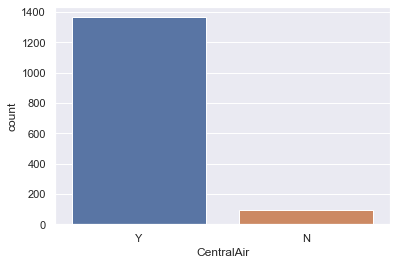

In [4]:
sb.countplot(houseData['CentralAir'])

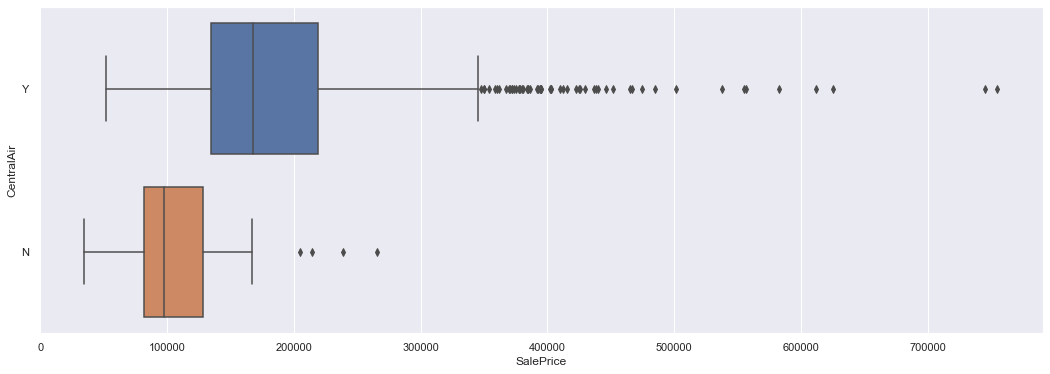

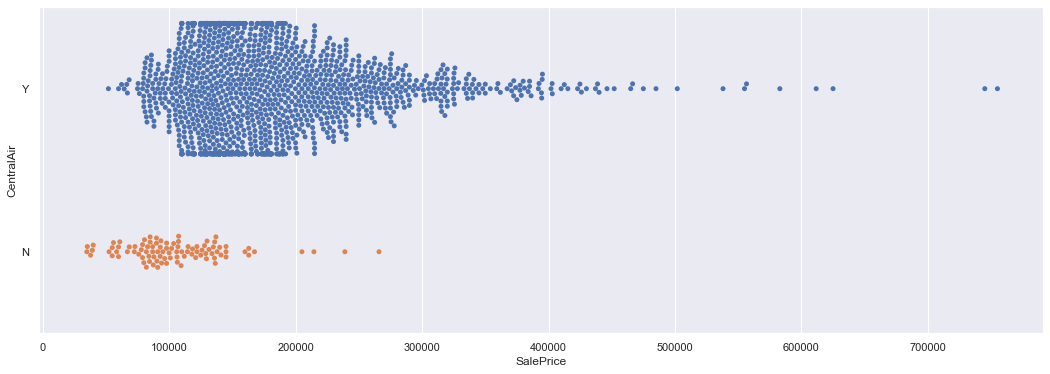

In [5]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = houseData['SalePrice'], y = houseData['CentralAir'], data = houseData, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = houseData['SalePrice'], y = houseData['CentralAir'], data = houseData, orient = "h")

In [6]:
houseData_train = pd.DataFrame(houseData[:1100])
houseData_test = pd.DataFrame(houseData[-360:])

print("Train Set :", houseData_train.shape, houseData_train.shape)
print("Test Set  :", houseData_test.shape, houseData_test.shape)

Train Set : (1100, 81) (1100, 81)
Test Set  : (360, 81) (360, 81)


In [7]:
from sklearn.tree import DecisionTreeClassifier 

y_train = pd.DataFrame(houseData_train['CentralAir'])  
X_train = pd.DataFrame(houseData_train['SalePrice']) 

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

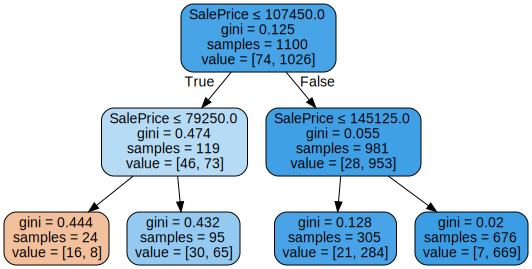

In [8]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.94


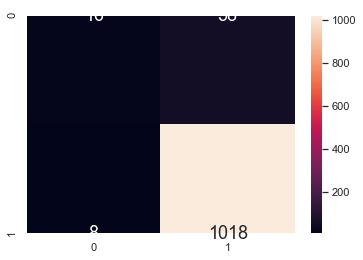

In [9]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [10]:
y_test = pd.DataFrame(houseData_test['CentralAir'])  
X_test = pd.DataFrame(houseData_test['SalePrice']) 

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

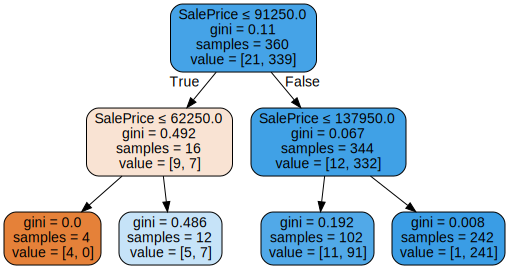

In [11]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9527777777777777


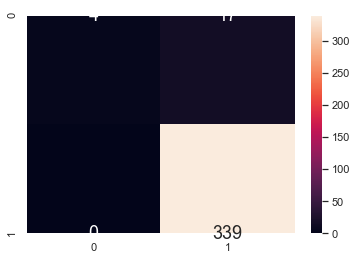

In [12]:
y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9390909090909091

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9527777777777777



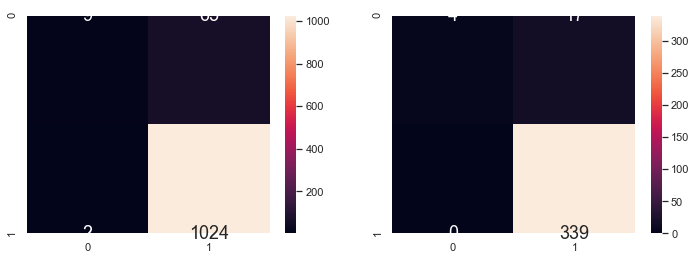

In [13]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [14]:
# Q2

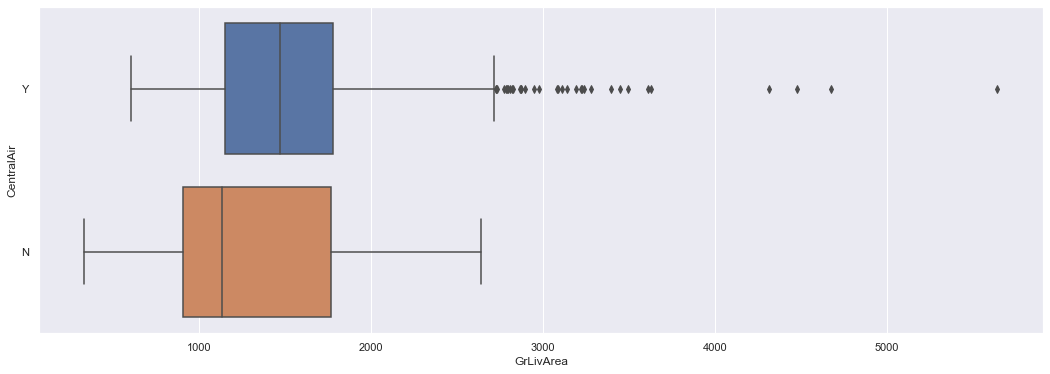

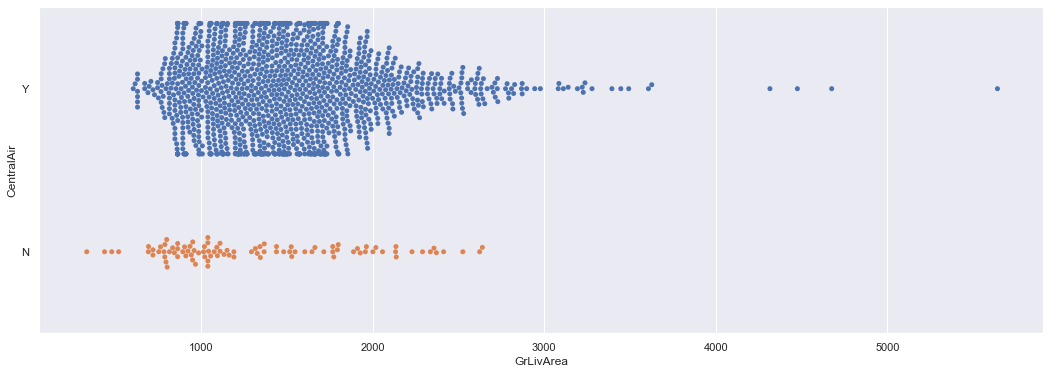

In [15]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = houseData['GrLivArea'], y = houseData['CentralAir'], data = houseData, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = houseData['GrLivArea'], y = houseData['CentralAir'], data = houseData, orient = "h")

In [16]:
from sklearn.tree import DecisionTreeClassifier 
y_train = pd.DataFrame(houseData_train['CentralAir'])  
X_train = pd.DataFrame(houseData_train['GrLivArea']) 

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

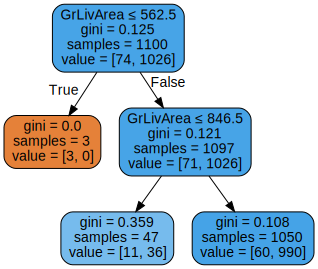

In [17]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9354545454545454


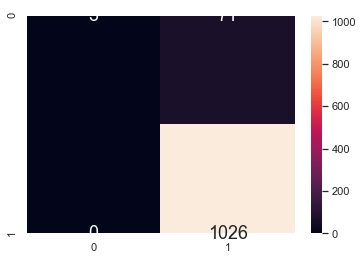

In [18]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [19]:
from sklearn.tree import DecisionTreeClassifier 
y_test = pd.DataFrame(houseData_test['CentralAir'])  
X_test = pd.DataFrame(houseData_test['GrLivArea']) 

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

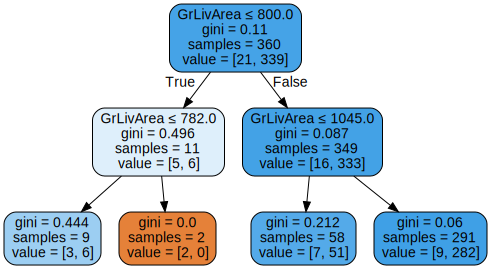

In [20]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9472222222222222


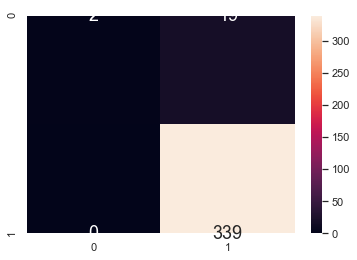

In [21]:
y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9309090909090909

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222



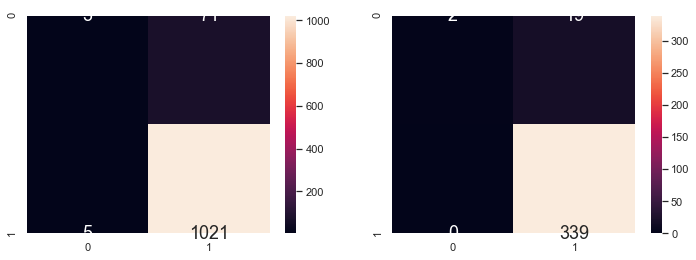

In [22]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

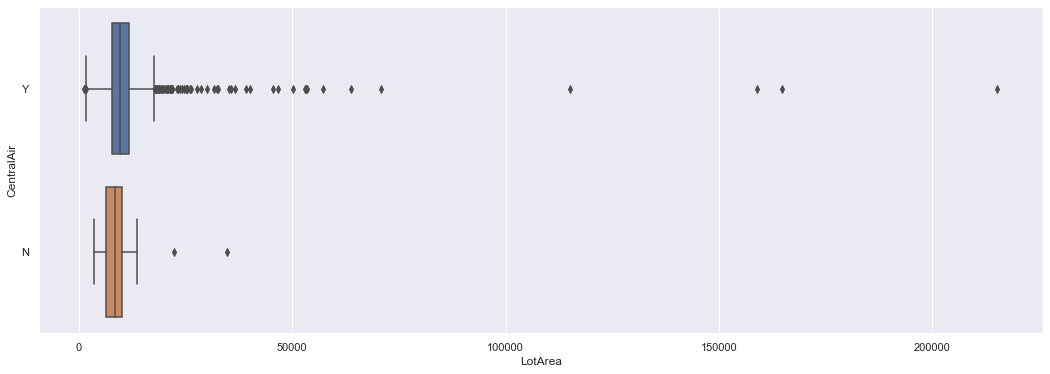

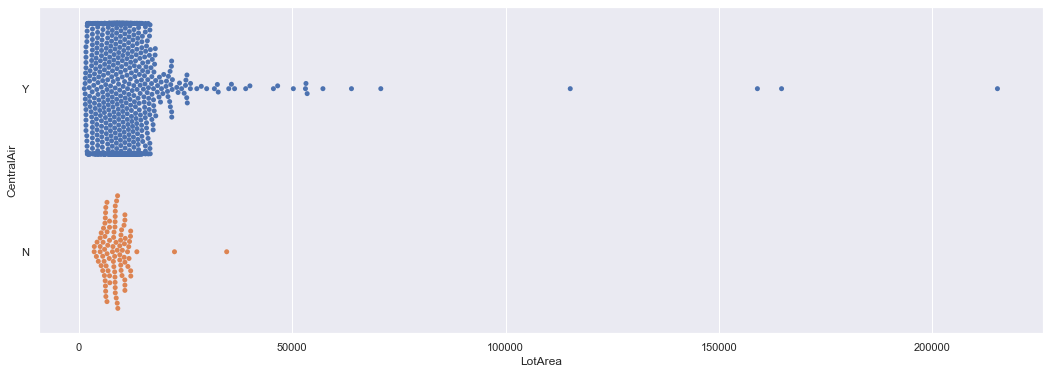

In [23]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = houseData['LotArea'], y = houseData['CentralAir'], data = houseData, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = houseData['LotArea'], y = houseData['CentralAir'], data = houseData, orient = "h")

In [24]:
from sklearn.tree import DecisionTreeClassifier 
y_train = pd.DataFrame(houseData_train['CentralAir'])  
X_train = pd.DataFrame(houseData_train['LotArea']) 

from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

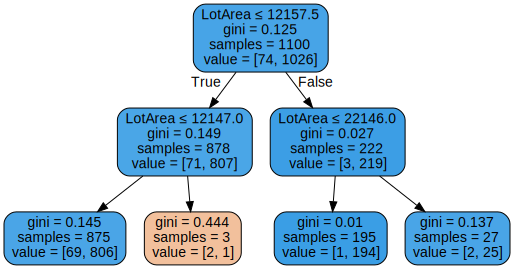

In [25]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9336363636363636


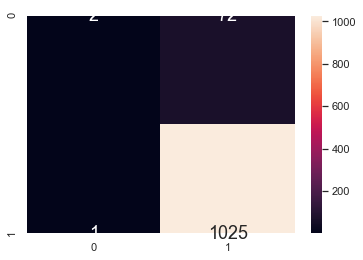

In [26]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [27]:
from sklearn.tree import DecisionTreeClassifier 
y_test = pd.DataFrame(houseData_test['CentralAir'])  
X_test = pd.DataFrame(houseData_test['LotArea']) 

from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

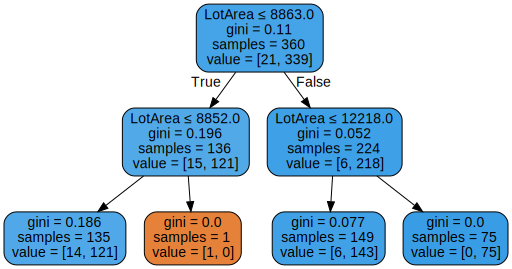

In [28]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9444444444444444


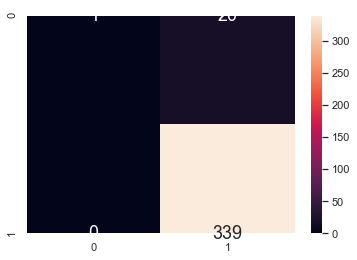

In [29]:
y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9327272727272727

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9444444444444444



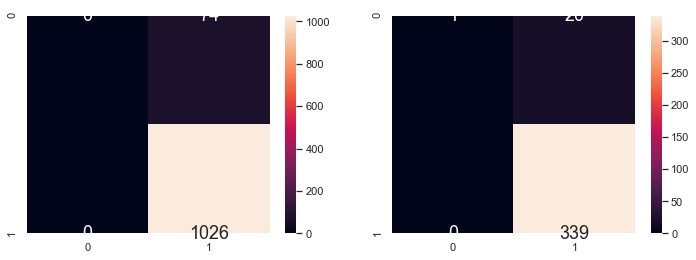

In [30]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

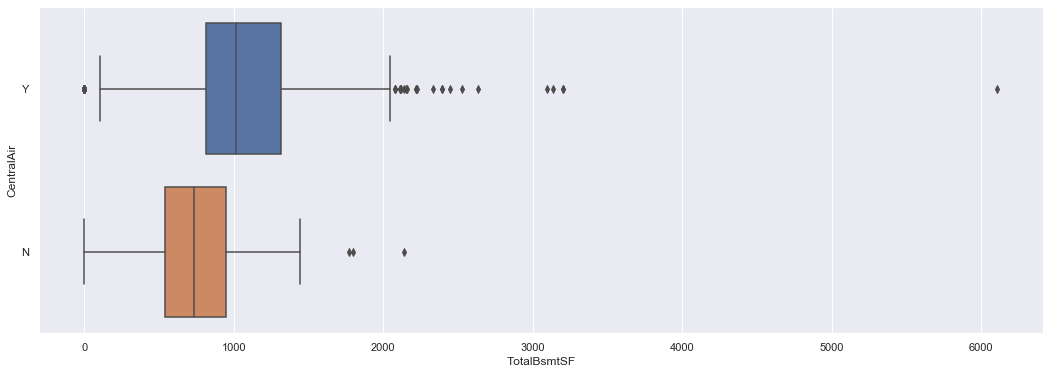

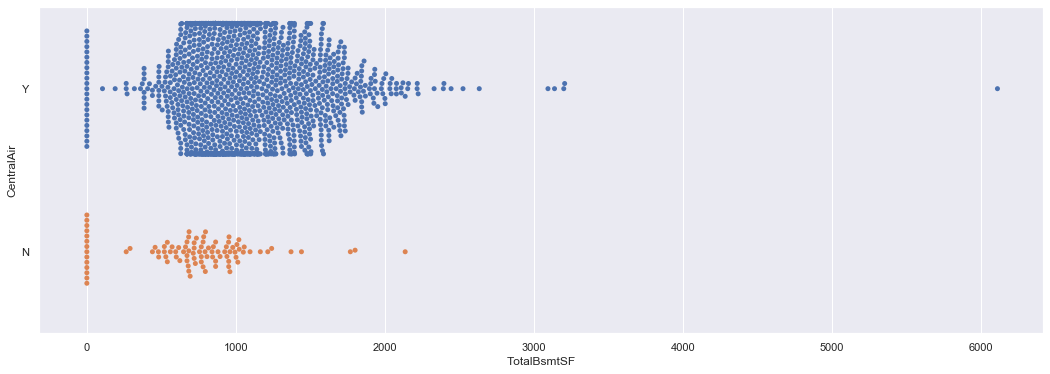

In [31]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = houseData['TotalBsmtSF'], y = houseData['CentralAir'], data = houseData, orient = "h")

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = houseData['TotalBsmtSF'], y = houseData['CentralAir'], data = houseData, orient = "h")

In [32]:
from sklearn.tree import DecisionTreeClassifier
y_train = pd.DataFrame(houseData_train['CentralAir'])  
X_train = pd.DataFrame(houseData_train['TotalBsmtSF']) 

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

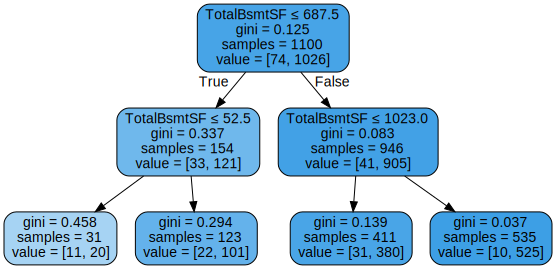

In [33]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9327272727272727


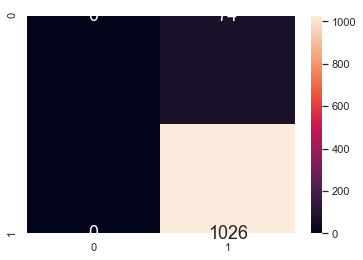

In [34]:
y_train_pred = dectree.predict(X_train)

print("Classification Accuracy \t:", dectree.score(X_train, y_train))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [35]:
from sklearn.tree import DecisionTreeClassifier 
y_test = pd.DataFrame(houseData_test['CentralAir'])  
X_test = pd.DataFrame(houseData_test['TotalBsmtSF'])  

from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

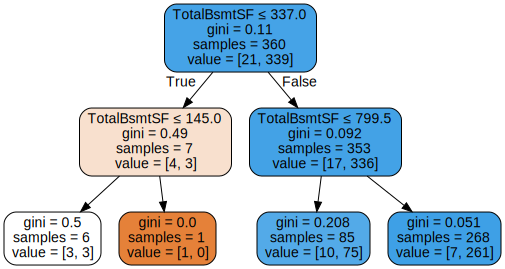

In [36]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(dectree,                                     
                          feature_names = X_train.columns,         
                          out_file = None,                             
                          filled = True,                               
                          rounded = True,                              
                          special_characters = True)                   

import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9444444444444444


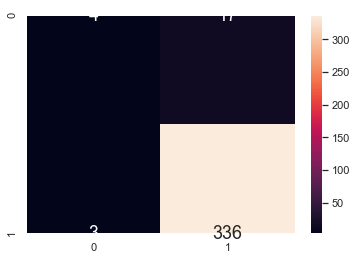

In [37]:
y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.92

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9444444444444444



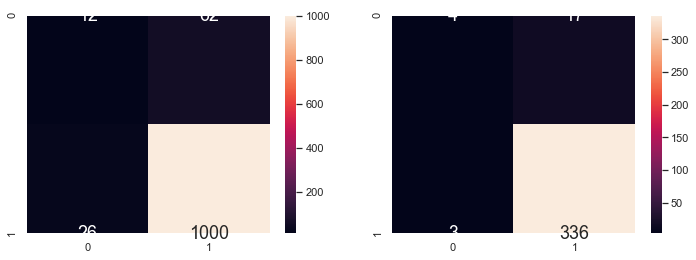

In [38]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
# The best model to predict CentralAir is the model CentralAir against SalePrice.
# This is because it has the highest classification accuracy for train and test,
# and overall best true positive to false positive ratio (1024:65)